<a href="https://colab.research.google.com/github/Morshed-Alam/Sussex-Huawei-Locomotion-Challenge-2021/blob/main/SHL_feature_analysis_selection_and_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All the files we saved will find
[here](https://drive.google.com/drive/folders/18NjSyrEIbtnT5V56xoC3odkS0TEQuFaw?usp=sharing) .

## Framing and Feature analysis

### Framing functions

In [ ]:
def timewise_segmentation(data, time):
  from tqdm import notebook as tqdm
  dataframe_list=[]
  segmented_dataframe=[]
  for i in tqdm.tqdm(np.arange(len(data)-1)):
    timedelta=pd.to_datetime(data.iloc[i+1]['Timestamp'])-pd.to_datetime(data.iloc[i]['Timestamp'])
    segmented_dataframe.append(data.iloc[i])
    if timedelta< pd.Timedelta(time):
      continue
    elif timedelta>= pd.Timedelta(time):
      dataframe=pd.DataFrame(segmented_dataframe)
      dataframe_list.append(dataframe)
      segmented_dataframe=[]

  segmented_dataframe.append(data.iloc[-1])
  dataframe=pd.DataFrame(segmented_dataframe)
  dataframe_list.append(dataframe)
    
  return dataframe_list

In [ ]:
def get_features(data, columns, overlap, window_size, disable=False):
  import scipy.stats as stats
  import scipy as sp
  import itertools
  import warnings
  from tqdm import notebook as tqdm
  warnings.filterwarnings("ignore")
  data = data[columns].astype(np.float64)
  
  list_mean = []                      # Mean
  list_std = []                       # Standard deviation
  list_median = []                    # Median
  list_sum = []                       # Sum
  list_min = []                       # Mininum
  list_max = []                       # Maximum
  list_skew = []                      # Unbiased skewness (3rd moment)
  list_kurt = []                      # Unbiased kurtosis (4th moment)
  list_mode = []                      # Mode
  list_mad = []                       # Mean absolute deviation
  list_quantile_5 = []                # 5% quantile
  list_quantile_25 = []               # 25% quantile
  list_quantile_50 = []               # 50% quantile
  list_quantile_75 = []               # 75% quantile
  list_quantile_90 = []               # 90% quantile
  list_quantile_95 = []               # 95% quantile
  list_iqr = []                       # Inter-quantile range
  list_autocorr = []                  # Auto correlation
  list_frame_item = []                # It will track the number of items in each frame without overlap

  l = len(data) - overlap
  if l <= 0:
     l = len(data)

  for i in tqdm.tqdm(range(0, l, window_size - overlap), disable=disable):
    start = i
    end = start + window_size
    win_channel = data.iloc[start:end]
    
    win_mean = win_channel.mean()
    win_std = win_channel.std()
    win_median = win_channel.median()
    win_sum = win_channel.sum()
    win_min = win_channel.min()
    win_max = win_channel.max()
    win_skew = win_channel.skew()
    win_kurt = win_channel.kurt()
    win_mode = list(itertools.chain(*stats.mode(win_channel)[0]))
    win_mad = win_channel.mad()
    win_quantile_5 = win_channel.quantile(q=0.05)
    win_quantile_25 = win_channel.quantile(q=0.25)
    win_quantile_50 = win_channel.quantile(q=0.50)
    win_quantile_75 = win_channel.quantile(q=0.75)
    win_quantile_90 = win_channel.quantile(q=0.90)
    win_quantile_95 = win_channel.quantile(q=0.95)
    win_iqr = win_quantile_75 - win_quantile_25
    win_autocorr = [win_channel.iloc[:, i].autocorr() for i in range(len(win_channel.columns))]
     
    list_mean.append(win_mean)
    list_std.append(win_std)
    list_median.append(win_median)
    list_sum.append(win_sum)
    list_min.append(win_min)
    list_max.append(win_max)
    list_skew.append(win_skew)
    list_kurt.append(win_kurt)
    list_mode.append(win_mode)
    list_mad.append(win_mad)
    list_quantile_5.append(win_quantile_5)
    list_quantile_25.append(win_quantile_25)
    list_quantile_50.append(win_quantile_50)
    list_quantile_75.append(win_quantile_75)
    list_quantile_90.append(win_quantile_90)
    list_quantile_95.append(win_quantile_95)
    list_iqr.append(win_iqr)
    list_autocorr.append(win_autocorr)
    list_frame_item.append(len(win_channel) - overlap)

  mean = pd.DataFrame(list_mean)
  std = pd.DataFrame(list_std)
  median = pd.DataFrame(list_median)  
  sum = pd.DataFrame(list_sum)
  min = pd.DataFrame(list_min)
  max = pd.DataFrame(list_max)
  skew = pd.DataFrame(list_skew)
  kurt = pd.DataFrame(list_kurt)
  mod = pd.DataFrame(list_mode)
  mad = pd.DataFrame(list_mad)
  quantile_5 = pd.DataFrame(list_quantile_5)
  quantile_5.index = np.arange(len(quantile_5))
  quantile_25 = pd.DataFrame(list_quantile_25)
  quantile_25.index = np.arange(len(quantile_25))
  quantile_50 = pd.DataFrame(list_quantile_50)
  quantile_50.index = np.arange(len(quantile_50))
  quantile_75 = pd.DataFrame(list_quantile_75)
  quantile_75.index = np.arange(len(quantile_75))
  quantile_90 = pd.DataFrame(list_quantile_90)
  quantile_90.index = np.arange(len(quantile_90))
  quantile_95 = pd.DataFrame(list_quantile_95)
  quantile_95.index = np.arange(len(quantile_95))
  iqr = pd.DataFrame(list_iqr)
  iqr.index = np.arange(len(iqr))
  autocorr = pd.DataFrame(list_autocorr)
  frame_item = pd.DataFrame(list_frame_item)
  # Last frame don't have overlap
  frame_item.iloc[-1] = frame_item.iloc[-1] + overlap

  all=pd.concat([mean, std, median, sum, min, max, skew, kurt, mod, mad, quantile_5, quantile_25, quantile_50, quantile_75, quantile_90, quantile_95, iqr, autocorr, frame_item],axis=1,ignore_index=True)

  all.columns=['mean_{}'.format(col) for col in columns] + \
              ['std_{}'.format(col) for col in columns] + \
              ['median_{}'.format(col) for col in columns] + \
              ['sum_{}'.format(col) for col in columns] + \
              ['min_{}'.format(col) for col in columns] + \
              ['max_{}'.format(col) for col in columns] + \
              ['skew_{}'.format(col) for col in columns] + \
              ['kurt_{}'.format(col) for col in columns] + \
              ['mod_{}'.format(col) for col in columns] + \
              ['mad_{}'.format(col) for col in columns] + \
              ['quantile5_{}'.format(col) for col in columns] + \
              ['quantile25_{}'.format(col) for col in columns] + \
              ['quantile50_{}'.format(col) for col in columns] + \
              ['quantile75_{}'.format(col) for col in columns] + \
              ['quantile90_{}'.format(col) for col in columns] + \
              ['quantile95_{}'.format(col) for col in columns] + \
              ['autocorr_{}'.format(col) for col in columns] + \
              ['iqr_{}'.format(col) for col in columns] + \
              ['frame_item']

  return all


In [ ]:
def get_labels(data, overlap, window_size, disable=False):
  import scipy.stats as stats
  from tqdm import notebook as tqdm
  labels=[]
  l = len(data) - overlap
  if l <= 0:
     l = len(data)

  for i in tqdm.tqdm(range(0, l, window_size - overlap), disable=disable):
    start = i
    end = start + window_size
  
    label=stats.mode(data.label[start:end])[0]
    labels.append(label)
    
  dt=pd.DataFrame(labels,columns=['label'])
  dt.dropna(inplace=True)
    
  return dt

### Download preprocessed data

In [ ]:
!rm -r /content/sample_data/
!gdown --id 1JYIFvuhSAIypwU1yJltAFTQgQ4OzB-l5
!gdown --id 1mkUpToQKA7JfjKHgRDYnU5UQ8nvbn2ky
!gdown --id 1--LcjYrcCRNF09ENe5ykD9TAjp5vrxgG

rm: cannot remove '/content/sample_data/': No such file or directory
Downloading...
From: https://drive.google.com/uc?id=1JYIFvuhSAIypwU1yJltAFTQgQ4OzB-l5
To: /content/train_prepared-v4.pickle
612MB [00:03, 169MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mkUpToQKA7JfjKHgRDYnU5UQ8nvbn2ky
To: /content/val_prepared-v4.pickle
89.8MB [00:00, 135MB/s]
Downloading...
From: https://drive.google.com/uc?id=1--LcjYrcCRNF09ENe5ykD9TAjp5vrxgG
To: /content/test_prepared-v4.pickle
413MB [00:03, 114MB/s]


In [ ]:
import pandas as pd
import numpy as np

train_prepared = pd.read_pickle('/content/train_prepared-v4.pickle')
val_prepared = pd.read_pickle('/content/val_prepared-v4.pickle')
test_prepared = pd.read_pickle('/content/test_prepared-v4.pickle')

In [ ]:
test_prepared.shape, train_prepared.shape, val_prepared.shape

((671172, 76), (980527, 77), (143958, 77))

### Time based frame generation

In [ ]:
train_segmented_list = timewise_segmentation(train_prepared, time='60s')
val_segmented_list = timewise_segmentation(val_prepared, time='60s')
test_segmented_list = timewise_segmentation(test_prepared, time='60s')

In [ ]:
def get(lists, require_label=True):
    from tqdm import notebook as tqdm
    df_list = []
    for l in tqdm.tqdm(lists):
        df = get_features(l, columns, overlap, windowsize, disable=True)
        if require_label:
           df_label = get_labels(l, overlap, windowsize, disable=True)
           df = pd.concat([df, df_label], axis = 1)
        df_list.append(df)
    return pd.concat([df for df in df_list], axis=0, ignore_index=True)

In [ ]:
overlap = 30
windowsize = 60
columns = train_prepared.columns[2:]

In [ ]:
train = get(train_segmented_list)
val = get(val_segmented_list)
test = get(test_segmented_list, require_label=False)

### Sequence based frame generation

In [ ]:
overlap = 30
windowsize = 60
columns = train_prepared.columns[2:]

In [ ]:
train = get_features(train_prepared, columns, overlap, windowsize)
train_label = get_labels(train_prepared, overlap, windowsize)
train = pd.concat([train, train_label], axis = 1)

In [ ]:
val = get_features(val_prepared, columns, overlap, windowsize)
val_label = get_labels(val_prepared, overlap, windowsize)
val = pd.concat([val, val_label], axis = 1)

In [ ]:
test = get_features(test_prepared, columns, overlap, windowsize)

In [ ]:
val.head()

### Save to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train.to_pickle('/content/drive/My Drive/SHL/data/train_features_time-v4.pickle')
val.to_pickle('/content/drive/My Drive/SHL/data/val_features_time-v4.pickle')
test.to_pickle('/content/drive/My Drive/SHL/data/test_features_time-v4.pickle')

In [ ]:
import pandas as pd
import numpy as np

train_features = pd.read_pickle('/content/drive/My Drive/SHL/data/train_features_time-v4.pickle')
val_features = pd.read_pickle('/content/drive/My Drive/SHL/data/val_features_time-v4.pickle')
test_features = pd.read_pickle('/content/drive/My Drive/SHL/data/test_features_time-v4.pickle')

## Feature Selection

In [ ]:
train_features = train
val_features = val
test_features = test

In [ ]:
X_train=train_features.drop(['label', 'frame_item'],axis=1)
y_train=train_features.label
X_val=val_features.drop(['label', 'frame_item'],axis=1)
y_val=val_prepared.label
X_test=test_features.drop(['frame_item'], axis=1)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
import pickle

filename = '/content/drive/My Drive/SHL/data/model.sav'           # Model will be saved on this file
model = XGBClassifier(seed=0, objective='multi:softmax')

In [ ]:
# Load previously trained model
model = pickle.load(open(filename, 'rb'))

In [ ]:
# Model training
%%time
model.fit(X_train,y_train)

CPU times: user 25min 53s, sys: 981 ms, total: 25min 54s
Wall time: 25min 47s


In [ ]:
# Save model for later use
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Model prediction
# Prediction on validation
%%time
y_pred = model.predict(X_val)

# Post process the prediction
y_pred_orig = []
for (pred, item) in zip(y_pred, val_features.frame_item):
    y_pred_orig += [pred] * item

# Accuraacy and F1 score
acc = accuracy_score(y_val,y_pred_orig)
f1 = f1_score(y_val, y_pred_orig, average='weighted')
print('acc: ', acc, 'f1: ', f1)

acc:  0.7903763597716 f1:  0.7930322937458494
CPU times: user 581 ms, sys: 23 ms, total: 604 ms
Wall time: 619 ms


In [ ]:
# Model prediction
# Prediction on train
%%time
y_pred = model.predict(X_train)

# Post process the prediction
y_pred_orig = []
for (pred, item) in zip(y_pred, train_features.frame_item):
    y_pred_orig += [pred] * item

# Accuraacy and F1 score
acc = accuracy_score(train_prepared.label ,y_pred_orig)
f1 = f1_score(train_prepared.label, y_pred_orig, average='weighted')
print('acc: ', acc, 'f1: ', f1)

acc:  0.8995325982864317 f1:  0.8993812017732423
CPU times: user 3.85 s, sys: 1.33 s, total: 5.18 s
Wall time: 5.19 s


In [ ]:
def plot_importance(model, topn=-1):
        import matplotlib.pyplot as plt
        from xgboost import plot_importance
        fig, ax = plt.subplots(1,1,figsize=(20, 120))
        plot_importance(model, ax=ax, grid=False)
        plt.show()
        save_topn_features(ax=ax, topn=topn)

def save_topn_features(ax, fname="XGBClassifier_topn_features.txt", topn=-1):
        yticklabels = ax.get_yticklabels()[::-1]
        if topn == -1:
            topn = len(yticklabels)
        else:
            topn = min(topn, len(yticklabels))
        with open(fname, "w") as f:
            for i in range(topn):
                f.write("%s\n"%yticklabels[i].get_text()) 

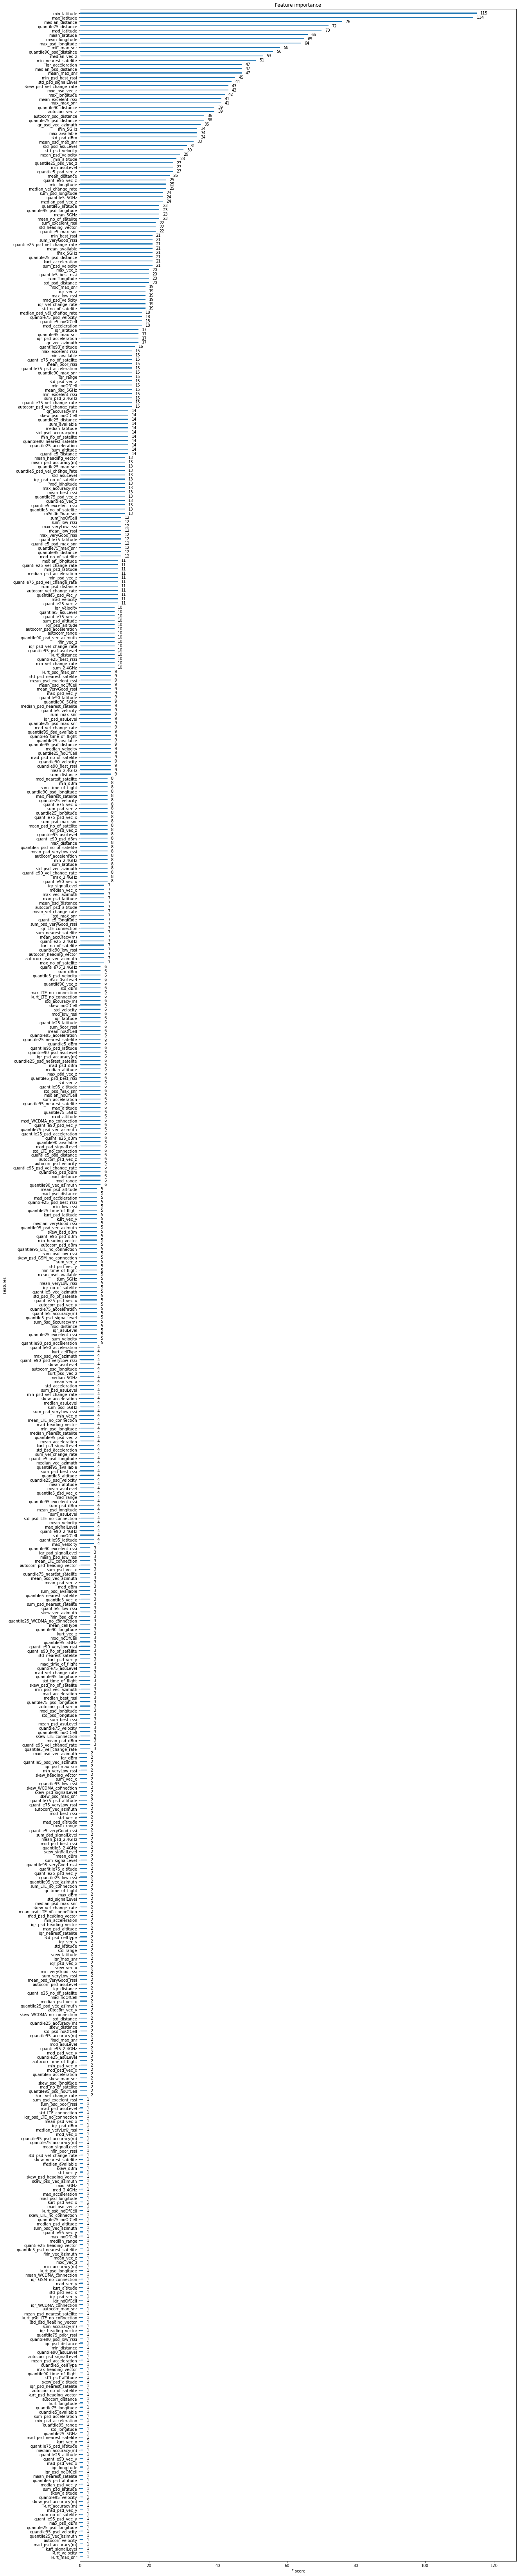

In [ ]:
# Plot feature importance score
plot_importance(model)

In [ ]:
# Select top 250 features based on feature importance score
def read_topn_features(n=50):
    topn_features = []
    with open('XGBClassifier_topn_features.txt') as f:
         lines = f.readlines()
         for line in lines:
             topn_features.append(line[:-1])
    return topn_features[:n]

selected_features = read_topn_features(250)

In [ ]:
# Save the selected features for future use
filename = '/content/drive/My Drive/SHL/data/selected_features.txt'
with open(filename, 'w') as f:
     for col in selected_features:
         f.write('%s\n' % col)

## Modeling with selected features

In [ ]:
# Read the selected columns from stored file
filename = '/content/drive/My Drive/SHL/data/selected_features.txt'
selected_features = []
with open(filename, 'r') as f:
     lines = f.readlines()
     for line in lines:
         selected_features.append(line[:-1])

### Training on train data only

In [ ]:
# Prepare data with selected features
X_train=train_features.drop(['label', 'frame_item'],axis=1)
y_train=train_features.label
X_val=val_features.drop(['label', 'frame_item'],axis=1)
y_val=val_prepared.label
X_train_selected = X_train.loc[:, selected_features]
X_val_selected = X_val.loc[:, selected_features]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
import pickle

filename = '/content/drive/My Drive/SHL/data/booster_train.sav'           # Model will be saved on this file
booster_train = XGBClassifier(seed=0, objective='multi:softmax')          # Model will be trained on train data only

In [ ]:
# Load previously trained model
booster_train = pickle.load(open(filename, 'rb'))

In [ ]:
# Model training
%%time
booster_train.fit(X_train_selected,y_train)

CPU times: user 6min 25s, sys: 314 ms, total: 6min 25s
Wall time: 6min 24s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Save model for later use
pickle.dump(booster, open(filename, 'wb'))

In [ ]:
%%time
# Prediction on validation
y_pred = booster_train.predict(X_val_selected)

# Post process the prediction
predictions_val = []
for (pred, item) in zip(y_pred, val_features.frame_item):
    predictions_val += [pred] * item

# Accuracy and F1 score
accuracy = accuracy_score(y_val, predictions_val)
f1 = f1_score(y_val, predictions_val, average='weighted')
print('accuracy: ', accuracy, 'f1_score: ', f1)

accuracy:  0.7911057391739257 f1_score:  0.7939493333219686
CPU times: user 352 ms, sys: 2.43 ms, total: 354 ms
Wall time: 263 ms


In [ ]:
%%time
# Prediction on train
y_pred = booster_train.predict(X_train_selected)

# Post process the prediction
predictions_train = []
for (pred, item) in zip(y_pred, train_features.frame_item):
    predictions_train += [pred] * item

# Accuracy and F1 score
accuracy = accuracy_score(train_prepared.label, predictions_train)
f1 = f1_score(train_prepared.label, predictions_train, average='weighted')
print('accuracy', accuracy, 'f1_score: ', f1)

accuracy 0.8990767209877953 f1_score:  0.8988268408836743
CPU times: user 2.19 s, sys: 6.98 ms, total: 2.2 s
Wall time: 1.6 s


In [ ]:
# Make a dataframe with original label and predicted label
filename = '/content/drive/My Drive/SHL/data/predictions_on_val.csv'
label_df = pd.DataFrame(predictions_val, columns=['label_pred'])
pred = val_prepared[['Timestamp', 'label']]
pred.index = np.arange(len(pred))
label_df = pd.concat([pred, label_df], axis=1)
label_df['Timestamp'] = label_df['Timestamp'].astype(np.int64) // 10**6
label_df.to_csv(filename, sep='\t', header=False, index=False)
label_df

,Timestamp,label,label_pred
0,1497427492000,3,3
1,1497427493000,3,3
2,1497427494000,3,3
3,1497427495000,3,3
4,1497427496000,3,3
...,...,...,...
143953,7497460755000,2,1
143954,7497460756000,2,1
143955,7497460757000,2,1
143956,7497460758000,2,1


(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6c01563bd0>)

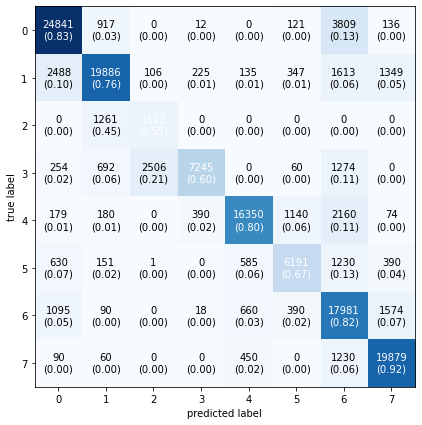

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_val, predictions_val)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

### Training on train & validation

In [ ]:
# Merge train & validation data
features = pd.concat([train_features, val_features], axis=0, ignore_index=True)
X_features = features.drop(['label', 'frame_item'], axis=1)
y = features.label
X_selected = X_features.loc[:, selected_features]
X_test=test_features.drop(['frame_item'], axis=1)
X_test_selected = X_test.loc[:, selected_features]

In [ ]:
X_selected.shape, X_test_selected.shape

((37019, 250), (22166, 250))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
import pickle

filename = '/content/drive/My Drive/SHL/data/booster.sav'           # Model will be saved on this file
booster = XGBClassifier(seed=0, objective='multi:softmax')          # Model will be trained on train & validation data

In [ ]:
# Load previously trained model
booster = pickle.load(open(filename, 'rb'))

In [ ]:
# Model training
%%time
booster.fit(X_selected, y)

CPU times: user 7min 28s, sys: 390 ms, total: 7min 28s
Wall time: 7min 26s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Save model for later use
pickle.dump(booster, open(filename, 'wb'))

In [ ]:
%%time
# Prediction on test
y_pred = booster.predict(X_test_selected)

# Post process the prediction
predictions_test = []
for (pred, item) in zip(y_pred, test_features.frame_item):
    predictions_test += [pred] * item

CPU times: user 920 ms, sys: 2.99 ms, total: 923 ms
Wall time: 922 ms


In [ ]:
%%time
# Prediction on train & val
y_pred = booster.predict(X_selected)

# Post process the prediction
predictions = []
for (pred, item) in zip(y_pred, features.frame_item):
    predictions += [pred] * item

# F1 score
f1 = f1_score(pd.concat([train_prepared, val_prepared], axis=0, ignore_index=True)['label'], predictions, average='weighted')
print('f1_score: ', f1)

f1_score:  0.8907845748781759
CPU times: user 2.89 s, sys: 1.97 s, total: 4.86 s
Wall time: 4.9 s


In [ ]:
# Make a dataframe with original label and predicted label
filename = '/content/drive/My Drive/SHL/data/predictions.csv'
label_df = pd.DataFrame(predictions_test, columns=['label_pred'])
pred = test_prepared[['Timestamp']]
pred.index = np.arange(len(pred))
label_df = pd.concat([pred, label_df], axis=1)
label_df['Timestamp'] = label_df['Timestamp'].astype(np.int64) // 10**6
label_df.to_csv(filename, sep='\t', header=False, index=False)
label_df

,Timestamp,label_pred
0,2496835246000,1
1,2496835247000,1
2,2496835248000,1
3,2496835249000,1
4,2496835250000,1
...,...,...
671167,3500318015000,1
671168,3500318016000,1
671169,3500318017000,1
671170,3500318018000,1
